# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?"




In [4]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    

# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["timezone"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manatutu
City not found. Skipping...
Processing Record 2 of Set 1 | fada
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | nabire
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | whangarei
Processing Record 8 of Set 1 | petawawa
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | mareeba
Processing Record 12 of Set 1 | el porvenir
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | takab
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | tazacorte
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | bartica
Processing Record 20 of Set 1 | tazovsky
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | port lincoln
Processing 

In [5]:
city_weather

{'coord': {'lon': -66.3356, 'lat': -33.295},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 300.89,
  'feels_like': 300.02,
  'temp_min': 300.89,
  'temp_max': 300.89,
  'pressure': 1005,
  'humidity': 29,
  'sea_level': 1005,
  'grnd_level': 919},
 'visibility': 10000,
 'wind': {'speed': 1.22, 'deg': 109, 'gust': 4.2},
 'clouds': {'all': 44},
 'dt': 1712608871,
 'sys': {'country': 'AR', 'sunrise': 1712572949, 'sunset': 1712614271},
 'timezone': -10800,
 'id': 3837056,
 'name': 'San Luis',
 'cod': 200}

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fada,9.5667,8.3000,302.34,42,97,1.01,NG,3600
1,grytviken,-54.2811,-36.5092,274.51,89,75,3.68,GS,-7200
2,nabire,-3.3667,135.4833,297.06,93,100,0.79,ID,32400
3,port-aux-francais,-49.3500,70.2167,280.95,80,84,15.72,TF,18000
4,port alfred,-33.5906,26.8910,292.69,95,82,1.34,ZA,7200


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fada,9.5667,8.3000,302.34,42,97,1.01,NG,3600
1,grytviken,-54.2811,-36.5092,274.51,89,75,3.68,GS,-7200
2,nabire,-3.3667,135.4833,297.06,93,100,0.79,ID,32400
3,port-aux-francais,-49.3500,70.2167,280.95,80,84,15.72,TF,18000
4,port alfred,-33.5906,26.8910,292.69,95,82,1.34,ZA,7200


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

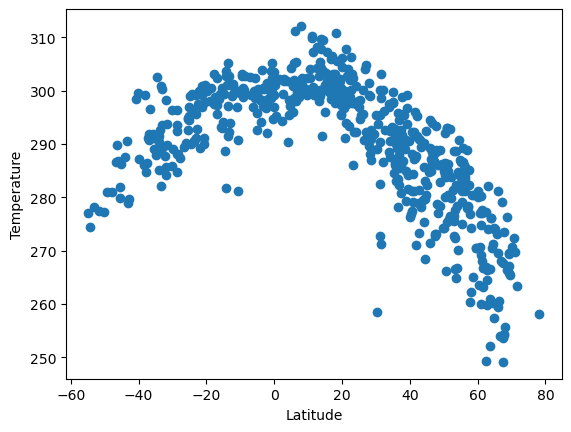

<Figure size 640x480 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

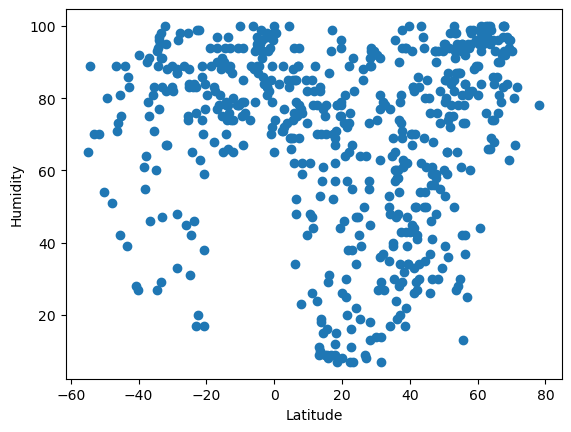

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values= city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

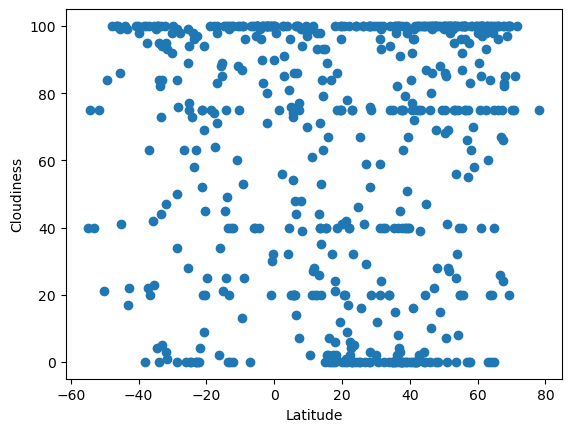

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

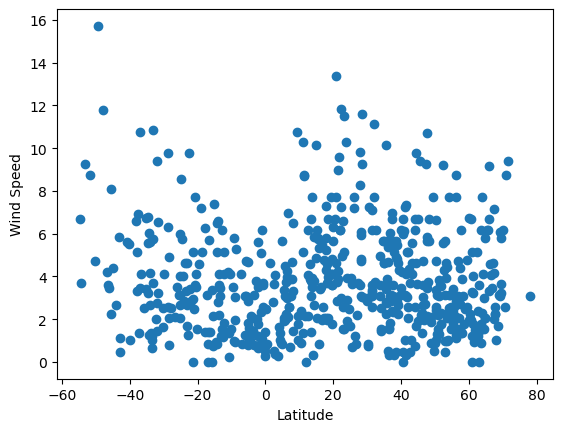

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)



City_ID
0      3.795794
1      4.002199
2      3.837605
3      3.986258
4      3.935311
         ...   
586    3.826829
587    3.766650
588    3.641473
589    3.613466
590    3.934356
Name: Lat, Length: 591, dtype: float64
y = -0.0x +3.83


The r-value is: 0.0017579358966716494


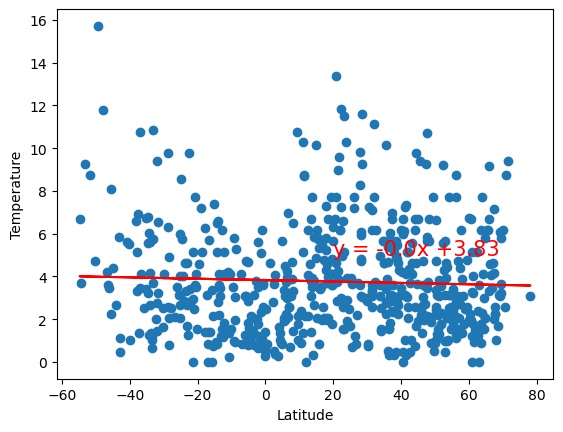

In [24]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
if city_data_df["Lat"]>= 0:
    horthern_hemi_df 
# Display sample data
northern_hemi_df.head()

SyntaxError: expected ':' (3136464514.py, line 2)

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE